<a href="https://colab.research.google.com/github/akalakheti/Auto_encoder/blob/master/Auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0 #tf2 install

# Import tf.keras libraries

In [0]:
#import tf.keras libraries
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D,Dense, MaxPooling2D, UpSampling2D 

#Import required libraries

In [0]:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

From tf.keras.datasets, fashion_mnist dataset is loaded. We separate train and test data but omit the labels of both as this is an unsupervised learning model.

In [0]:
(train_data,_), (test_data,_) = fashion_mnist.load_data()  #download fashion mnist dataset and separate train and test set

4423680/4422102 [==============================] - 0s 0us/step


As we require to normalize the dataset to a value between 0 to 1, we divide the image by 255.0 and also increase the dimension of the image from 2D to 3D as the model requires so.

In [0]:
#function to normalize and reize the image according to need
def scale(image):
  image = image.astype('float32')/255.0
  image = np.reshape(image, (len(image),28,28,1))
  return image

In [0]:
train = scale(train_data)
test = scale(test_data)

We create a placeholder input image for creating the model with dimensions 28x28x1.

In [0]:
img = Input(shape=(28,28,1)) #Dummy input image for model

## Encoder
The first layer of the encoder is Convolutional layer followed by max pooling which downsamples the image. The encoder ends after max pooling.

In [0]:
#Encoder model creation starts
layer = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(img) #convolutional layer of encoder

In [0]:
encoded = MaxPooling2D((2,2), padding='same')(layer)

## Decoder
The first layer of decoder is also convolutional layer followed by upsampling layer so as the balance the effect by down sampling in encoder. The decoder ends with the final convolutional layer with sigmoid activation function.

In [0]:
#Decoder Layer starts
layer = Conv2D(32,(3,3), activation = 'relu', padding='same')(encoded) #Convolutional layer of decoder

In [0]:
layer = UpSampling2D((2,2))(layer)

In [0]:
decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(layer) 

In [0]:
model = Model(inputs=img, outputs=decoded) #group the created model

The above created model is compiled with ada delta optimizer and binary cross entropy as loss function.

In [0]:
model.compile(optimizer='adadelta', loss='binary_crossentropy') #compiling the created model

A Checkpoint is created so as to save the training progress after each epoch

In [0]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='checkpoint.ckpt',
                                                 save_weights_only=True,
                                                 verbose=1) #Checkpointing the training progress

The actual training of model starts.

In [0]:
model.fit(train,train,epochs=40,batch_size=256, callbacks=[checkpoint], shuffle=True, validation_data=(test,test)) #Training the model

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
59136/60000 [============================>.] - ETA: 0s - loss: 0.6945
Epoch 00001: saving model to checkpoint.ckpt
60000/60000 [==============================] - 7s 124us/sample - loss: 0.6945 - val_loss: 0.6935
Epoch 2/40
59136/60000 [============================>.] - ETA: 0s - loss: 0.6925
Epoch 00002: saving model to checkpoint.ckpt
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6925 - val_loss: 0.6914
Epoch 3/40
59392/60000 [============================>.] - ETA: 0s - loss: 0.6903
Epoch 00003: saving model to checkpoint.ckpt
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6903 - val_loss: 0.6891
Epoch 4/40
59136/60000 [============================>.] - ETA: 0s - loss: 0.6879
Epoch 00004: saving model to checkpoint.ckpt
60000/60000 [==============================] - 4s 68us/sample - loss: 0.6879 - val_loss: 0.6867
Epoch 5/40
59392/60000 [============================>.] - ETA

The model is used to create prediction or decode the inputted image.

In [0]:
output = model.predict(test) #Prediction from the model

Using matplotlib.pyplot, we will be visualizing the predicted image and actual image.
# Actual Image


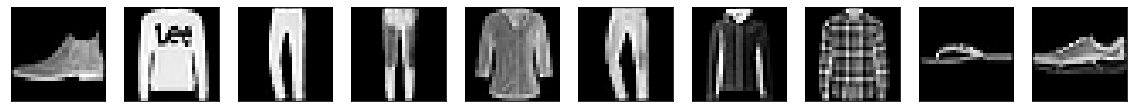

In [0]:
n_items=10
plt.figure(figsize=(20,4))
for i in range(n_items):
  displayer = plt.subplot(2,n_items,i+1)
  plt.imshow(test[i].reshape(28,28))
  plt.gray()
  displayer.get_xaxis().set_visible(False)
  displayer.get_yaxis().set_visible(False)


# Predicted Image

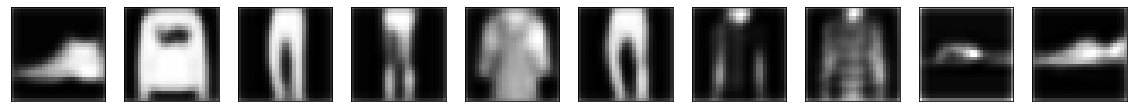

In [0]:
plt.figure(figsize=(20,4))
for i in range(n_items):
  displayer2 = plt.subplot(2,n_items,i+1)
  
  plt.imshow(output[i].reshape(28,28))
  plt.gray()
  displayer2.get_xaxis().set_visible(False)
  displayer2.get_yaxis().set_visible(False)